# Import the necessary packages

In [10]:
import pandas as pd
import pylab as pl
import seaborn as sn
import numpy as np
import zipfile
import geopandas as gp

%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Import the Zillow data for rent value across the US by Zip Code

In [2]:
rent = pd.read_csv("Zip_rent.csv")

In [3]:
rent.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-11,2010-12,2011-01,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,3538,3527,3537,3551,3572,3579,3576,3555,3528,3509
1,84654,60657,Chicago,IL,Chicago,Cook,2,1731.0,1742.0,1750.0,...,1879,1889,1896,1902,1905,1906,1897,1886,1877,1872
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,3791,3799,3848,3899,3944,3946,3919,3869,3831,3782
3,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,4,1577.0,1576.0,1582.0,...,1927,1928,1930,1930,1930,1930,1929,1923,1915,1908
4,91982,77494,Cinco Ranch,TX,Houston,Fort Bend,5,2184.0,2185.0,2181.0,...,2157,2153,2154,2154,2154,2153,2159,2170,2182,2191


# Filter only Zipcodes located in California

In [4]:
rent_ca = rent[rent["State"] == "CA"]

In [5]:
print (rent.shape)
print (rent_ca.shape)

(15921, 95)
(1244, 95)


# Read the Zipcodes polygon shapefile that TIGER has.

In [8]:
zip_ref = zipfile.ZipFile("tl_2015_us_zcta510.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [11]:
zipcodes = gp.GeoDataFrame.from_file("tl_2015_us_zcta510.shp")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


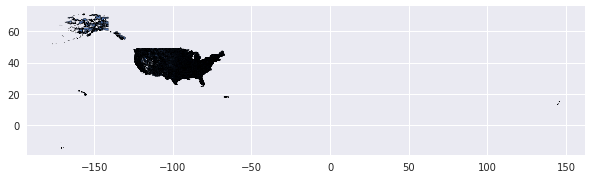

In [13]:
zipcodes.plot(figsize(10,10), edgecolor = "black")


In [14]:
zipcodes.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,43451,43451,B5,G6350,S,63411475,157689,+41.3183010,-083.6174935,"POLYGON ((-83.674464 41.331119, -83.6744449999..."
1,43452,43452,B5,G6350,S,121783676,13437379,+41.5157923,-082.9809454,"POLYGON ((-83.067745 41.537718, -83.067729 41...."
2,43456,43456,B5,G6350,S,9389361,999166,+41.6468445,-082.8226641,"(POLYGON ((-82.8566 41.681222, -82.856831 41.6..."
3,43457,43457,B5,G6350,S,48035540,0,+41.2673266,-083.4274645,"POLYGON ((-83.467474 41.268186, -83.4676039999..."
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,"POLYGON ((-83.222292 41.531025, -83.2222819999..."


# Check the variable that contains the zipcode in both datasets so that we can merge properly. Transform it into a string.

In [18]:
print (type(zipcodes.ZCTA5CE10.iloc[1]))
print (type(rent_ca.RegionName.iloc[1]))

<class 'str'>
<class 'numpy.int64'>


In [19]:
rent_ca["RegionName"] = rent_ca.RegionName.astype(str)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
print (type(zipcodes.ZCTA5CE10.iloc[1]))
print (type(rent_ca.RegionName.iloc[1]))

<class 'str'>
<class 'str'>


# Merge the datasets

In [21]:
zips = pd.merge(rent_ca, zipcodes, right_on = "ZCTA5CE10", left_on = "RegionName")

In [22]:
zips.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-11,2010-12,2011-01,...,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,97564,94109,San Francisco,CA,San Francisco,San Francisco,13,2983.0,3002.0,3021.0,...,94109,94109,B5,G6350,S,3077741,295388,+37.7953881,-122.4224441,"POLYGON ((-122.426671 37.809639, -122.426625 3..."
1,96107,90250,Hawthorne,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,19,2127.0,2099.0,2087.0,...,90250,90250,B5,G6350,S,17339111,35693,+33.9147753,-118.3480828,"POLYGON ((-118.317782 33.919224, -118.317782 3..."
2,97771,94565,Pittsburg,CA,San Francisco,Contra Costa,34,1612.0,1633.0,1637.0,...,94565,94565,B5,G6350,S,78215739,9559562,+38.0145762,-121.9062550,"POLYGON ((-121.885177 38.047591, -121.88502 38..."
3,96027,90046,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,37,2922.0,2944.0,2961.0,...,90046,90046,B5,G6350,S,14980562,3009,+34.1078099,-118.3622474,"POLYGON ((-118.374841 34.102112, -118.375092 3..."
4,97711,94501,Alameda,CA,San Francisco,Alameda,74,2073.0,2079.0,2110.0,...,94501,94501,B5,G6350,S,20513096,9031622,+37.7737930,-122.2781151,"POLYGON ((-122.236488 37.771696, -122.236355 3..."


In [23]:
zips.shape

(1243, 105)

# Make a quick plot to see how California looks like

In [25]:
cali = gp.GeoDataFrame(zips)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


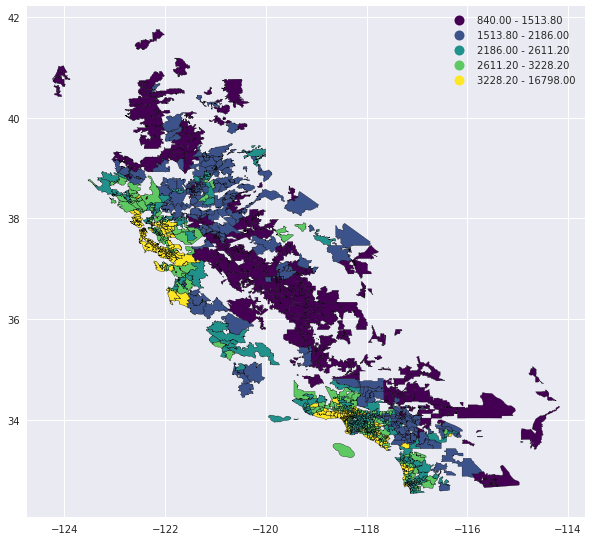

In [27]:
cali.plot(figsize=(10,10),column='2017-12',cmap='viridis',edgecolor='black',legend=True, scheme = "quantiles")

# It is not a great map and it is hard to get any valuable information from it, specially because we have a big amount of missing zip-codes, probably because there is no real state data for those, therefor we decide to focus only in the LA metro area.

In [28]:
los_angeles = cali[cali["Metro"] == "Los Angeles-Long Beach-Anaheim"]

# Calculation for the average rent price for every Zip Code in LA for foth 2014 and 2017. After we calculate the absolute difference between the average value of both years and also the percentual change in the value.

In [44]:
los_angeles["average_rent_2017"] = (los_angeles["2017-01"] + los_angeles["2017-02"] + los_angeles["2017-03"] + los_angeles["2017-04"] + los_angeles["2017-05"] + los_angeles["2017-06"] + los_angeles["2017-07"] + los_angeles["2017-08"] + los_angeles["2017-09"] + los_angeles["2017-10"] + los_angeles["2017-11"] + los_angeles["2017-12"])/12
los_angeles["average_rent_2014"] = (los_angeles["2014-01"] + los_angeles["2014-02"] + los_angeles["2014-03"] + los_angeles["2014-04"] + los_angeles["2014-05"] + los_angeles["2014-06"] + los_angeles["2014-07"] + los_angeles["2014-08"] + los_angeles["2014-09"] + los_angeles["2014-10"] + los_angeles["2014-11"] + los_angeles["2014-12"])/12

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [45]:
los_angeles["increase_3_year"] = los_angeles["average_rent_2017"] / los_angeles["average_rent_2014"]
los_angeles["3_year_absolute_rent_increase"] = los_angeles["average_rent_2017"]-los_angeles["average_rent_2014"]





/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


# Do 3 descriptive plots, Average rent price in 2017, Percentual rent increase and Absolute change.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


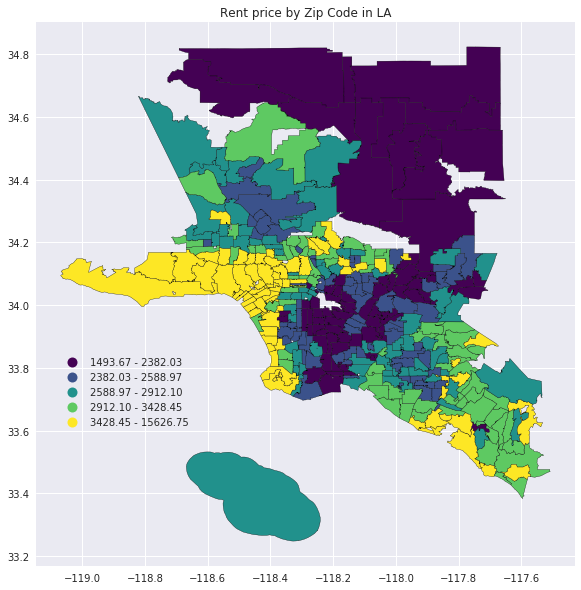

In [51]:
ax = los_angeles.plot(figsize=(10,10),column='average_rent_2017',cmap='viridis',edgecolor='black',legend=True, scheme = "quantiles")
plt.title("Rent price by Zip Code in LA")
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.1, 0.2, 0.2, 0.2))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


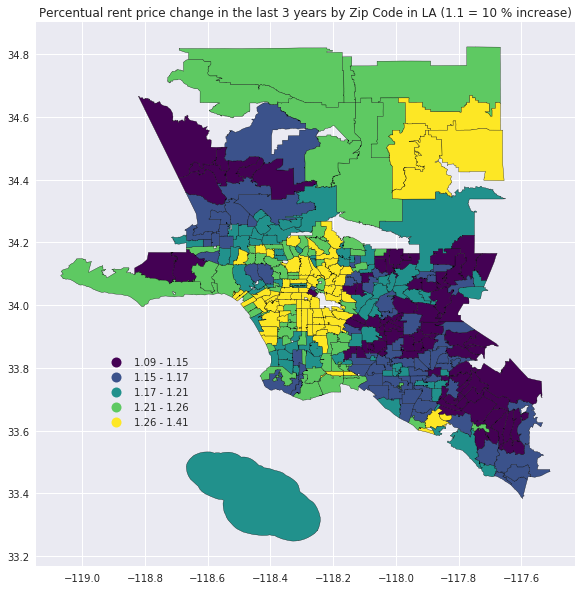

In [49]:
ax = los_angeles.plot(figsize=(10,10),column='increase_3_year',cmap='viridis',edgecolor='black',legend=True, scheme = "quantiles")
plt.title("Percentual rent price change in the last 3 years by Zip Code in LA (1.1 = 10 % increase)")
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.1, 0.2, 0.2, 0.2))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


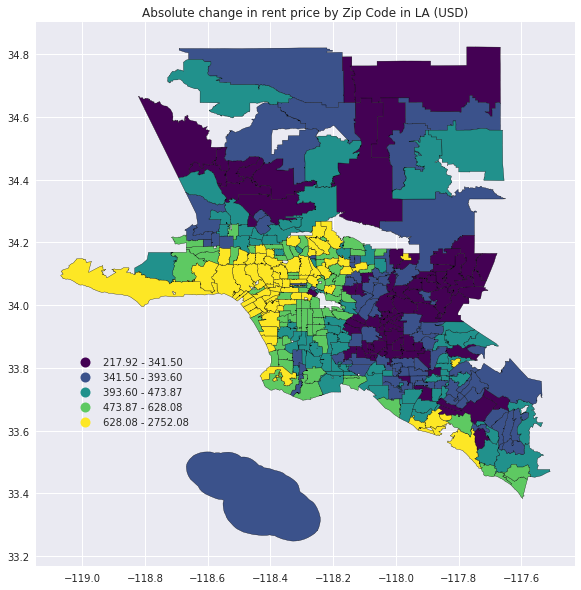

In [50]:
ax = los_angeles.plot(figsize=(10,10),column='3_year_absolute_rent_increase',cmap='viridis',edgecolor='black',legend=True, scheme = "quantiles")
plt.title("Absolute change in rent price by Zip Code in LA (USD)")
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.1, 0.2, 0.2, 0.2))

# Lets do some linear correlation plots to see how the average rent price in 2014 is correlated to the percentual change and the absolute change in rent prices. Meaning that we want to check how the original value of the property can explain an increase in the property value, either percentually or in absolute terms.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Percentual Increase in last 3 years')

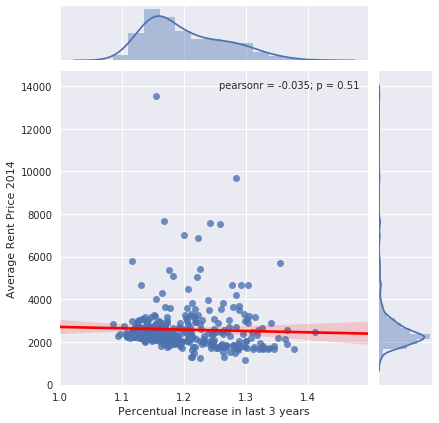

In [82]:
cambio_porcentual = sn.jointplot("increase_3_year", "average_rent_2014", data=los_angeles, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}})
pl.ylabel("Average Rent Price 2014")
pl.xlabel("Percentual Increase in last 3 years")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Absolute Increase in last 3 years')

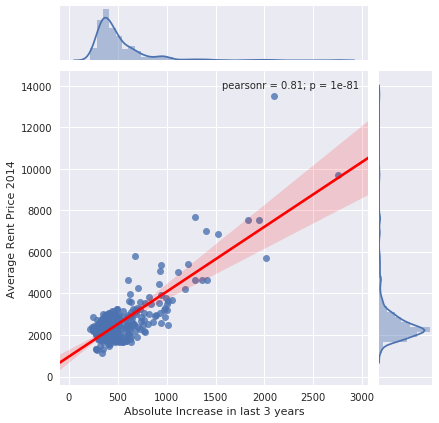

In [81]:
cambio_absoluto = sn.jointplot("3_year_absolute_rent_increase", "average_rent_2014", data=los_angeles, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}})
pl.ylabel("Average Rent Price 2014")
pl.xlabel("Absolute Increase in last 3 years")

# Oh, how interesting! the absolute value increase is very closely correlated to the absolute value of rent, nevertheless you cannot say the same about the porcentual rent increase, where there is no significant correlation. This means that expensive properties gain more value in absolute terms, but not necessarily when measuring it as a percentual increase.

# Now let's do it for property Value

In [57]:
h_value = pd.read_csv("Zip_home_value.csv")

In [58]:
h_value_ca = h_value[h_value["State"] == "CA"]

In [59]:
print (type(zipcodes.ZCTA5CE10.iloc[1]))
print (type(h_value_ca.RegionName.iloc[1]))

<class 'str'>
<class 'numpy.int64'>


In [60]:
h_value_ca["RegionName"] = h_value_ca.RegionName.astype(str)
zips1 = pd.merge(h_value_ca, zipcodes, right_on = "ZCTA5CE10", left_on = "RegionName")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [61]:
zips1.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,298200.0,295700.0,296400.0,...,94109,94109,B5,G6350,S,3077741,295388,+37.7953881,-122.4224441,"POLYGON ((-122.426671 37.809639, -122.426625 3..."
1,96107,90250,Hawthorne,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,16,NaN,NaN,NaN,...,90250,90250,B5,G6350,S,17339111,35693,+33.9147753,-118.3480828,"POLYGON ((-118.317782 33.919224, -118.317782 3..."
2,97771,94565,Pittsburg,CA,San Francisco,Contra Costa,24,122500.0,122200.0,122100.0,...,94565,94565,B5,G6350,S,78215739,9559562,+38.0145762,-121.9062550,"POLYGON ((-121.885177 38.047591, -121.88502 38..."
3,96027,90046,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,27,264500.0,265000.0,266600.0,...,90046,90046,B5,G6350,S,14980562,3009,+34.1078099,-118.3622474,"POLYGON ((-118.374841 34.102112, -118.375092 3..."
4,97711,94501,Alameda,CA,San Francisco,Alameda,57,206900.0,207900.0,208100.0,...,94501,94501,B5,G6350,S,20513096,9031622,+37.7737930,-122.2781151,"POLYGON ((-122.236488 37.771696, -122.236355 3..."


In [62]:
cali1 = gp.GeoDataFrame(zips1)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


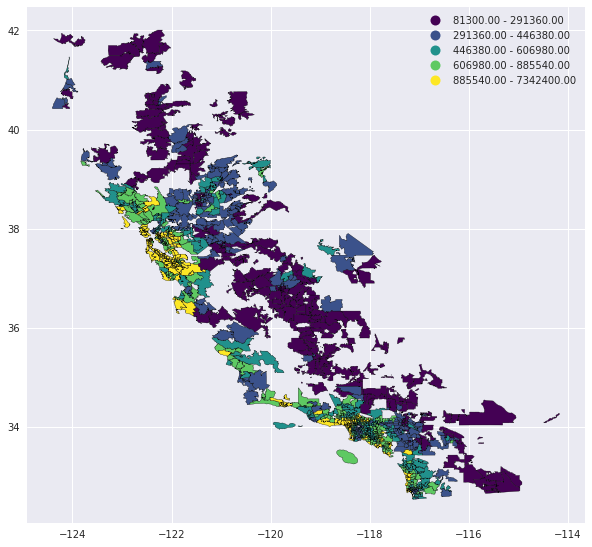

In [63]:
cali1.plot(figsize=(10,10),column='2017-12',cmap='viridis',edgecolor='black',legend=True, scheme = "quantiles")

In [64]:
los_angeles1 = cali1[cali1["Metro"] == "Los Angeles-Long Beach-Anaheim"]

In [70]:
los_angeles1["average_hv_2017"] = (los_angeles1["2017-01"] + los_angeles1["2017-02"] + los_angeles1["2017-03"] + los_angeles1["2017-04"] + los_angeles1["2017-05"] + los_angeles1["2017-06"] + los_angeles1["2017-07"] + los_angeles1["2017-08"] + los_angeles1["2017-09"] + los_angeles1["2017-10"] + los_angeles1["2017-11"] + los_angeles1["2017-12"])/12
los_angeles1["average_hv_2014"] = (los_angeles1["2014-01"] + los_angeles1["2014-02"] + los_angeles1["2014-03"] + los_angeles1["2014-04"] + los_angeles1["2014-05"] + los_angeles1["2014-06"] + los_angeles1["2014-07"] + los_angeles1["2014-08"] + los_angeles1["2014-09"] + los_angeles1["2014-10"] + los_angeles1["2014-11"] + los_angeles1["2014-12"])/12


los_angeles1["increase_3_year"] = los_angeles1["average_hv_2017"] / los_angeles1["average_hv_2014"]
los_angeles1["3_year_absolute_hv_increase"] = los_angeles1["average_hv_2017"]-los_angeles1["average_hv_2014"]


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to 

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


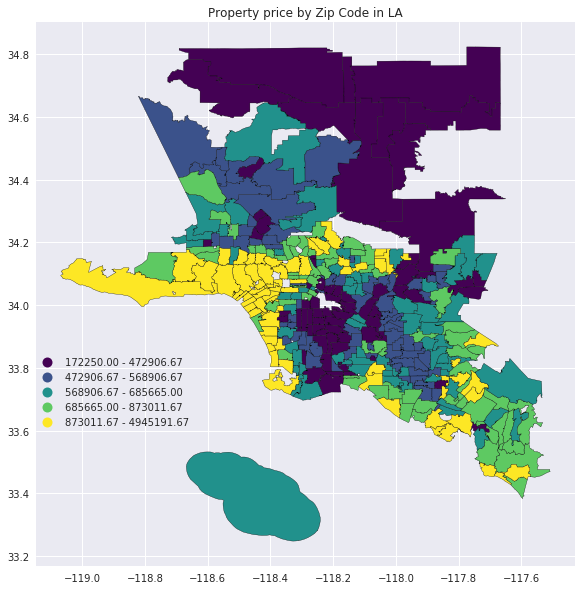

In [67]:
ax = los_angeles1.plot(figsize=(10,10),column='average_hv_2017',cmap='viridis',edgecolor='black',legend=True, scheme = "quantiles")
plt.title("Property price by Zip Code in LA")
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.1, 0.2, 0.2, 0.2))

In [72]:
los_angeles1 = los_angeles1[np.isfinite(los_angeles1['increase_3_year'])]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


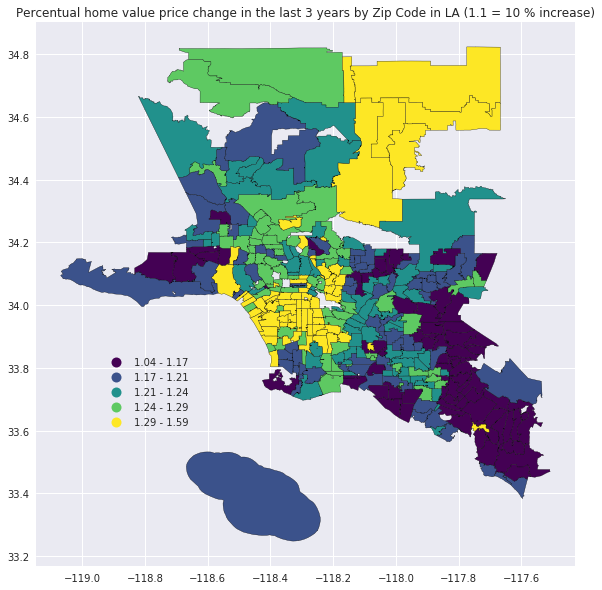

In [73]:
ax = los_angeles1.plot(figsize=(10,10),column='increase_3_year',cmap='viridis',edgecolor='black',legend=True, scheme = "quantiles")
plt.title("Percentual home value price change in the last 3 years by Zip Code in LA (1.1 = 10 % increase)")
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.1, 0.2, 0.2, 0.2))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


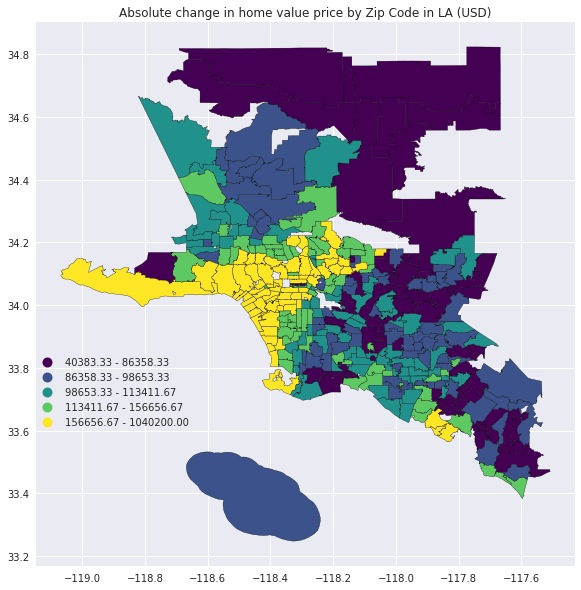

In [74]:
ax = los_angeles1.plot(figsize=(10,10),column='3_year_absolute_hv_increase',cmap='viridis',edgecolor='black',legend=True, scheme = "quantiles")
plt.title("Absolute change in home value price by Zip Code in LA (USD)")
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.1, 0.2, 0.2, 0.2))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Percentual home value Increase in last 3 years')

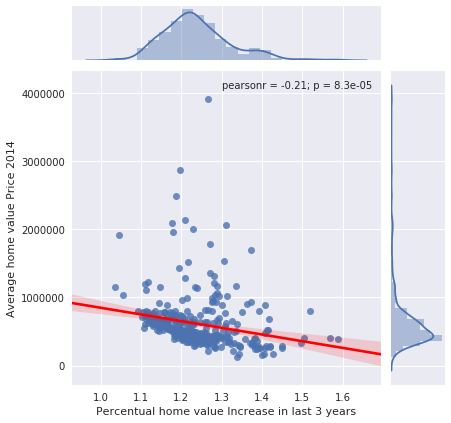

In [80]:
cambio_porcentual1 = sn.jointplot("increase_3_year", "average_hv_2014", data=los_angeles1, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}})
pl.ylabel("Average home value Price 2014")
pl.xlabel("Percentual home value Increase in last 3 years")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Absolute home value Increase in last 3 years')

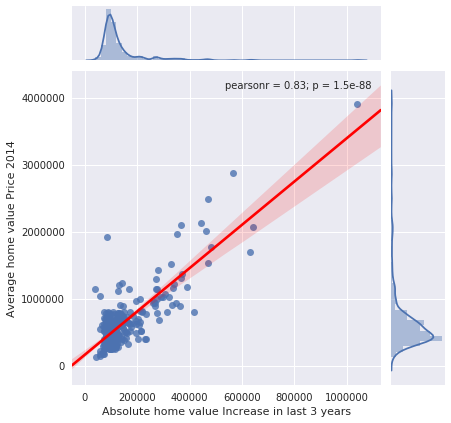

In [79]:
cambio_absoluto1 = sn.jointplot("3_year_absolute_hv_increase", "average_hv_2014", data=los_angeles1, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}})
pl.ylabel("Average home value Price 2014")
pl.xlabel("Absolute home value Increase in last 3 years")

# As expected, the behavior is very similar to the rent prices! the absolute value increase is very closely correlated to the absolute home value, nevertheless you cannot say the same about the porcentual home value increase, where there is a significant negative correlation. This means that expensive properties gain more value in absolute terms, but apparently the percentual increase is lower than cheap properties.